In [102]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
EGAD1 = pd.read_csv('../../data/EAGD/EGAD_bulk1_pc_OPfilteredGeneBalanced.csv')
EGAD5 = pd.read_csv('../../data/EAGD/EGAD_bulk5_pc_OPfilteredGeneBalanced.csv')
EGAD10 = pd.read_csv('../../data/EAGD/EGAD_bulk10_pc_OPfilteredGeneBalanced.csv')
EGAD15 = pd.read_csv('../../data/EAGD/EGAD_bulk15_pc_OPfilteredGeneBalanced.csv')
EGAD20= pd.read_csv('../../data/EAGD/EGAD_bulk20_pc_OPfilteredGeneBalanced.csv')
EGADavg = pd.read_csv('../../data/EAGD/EGAD_bulk_pc_OPfilteredGeneBalanced.csv')

In [104]:
def rename_col1(EGADdf, k):
    #renames column
    return EGADdf.rename(columns = {"auc" : f'aucK{k}'})

def rename_col1s(loEGAD, lok):
    loEGAD2 = []

    for n, EGAD in enumerate(loEGAD):
        loEGAD2.append(rename_col1(EGAD, lok[n]))
    return loEGAD2

In [105]:
loEGAD = [EGAD1, EGAD5, EAGD10, EGAD15, EGAD20, EGADavg]
lok = [1, 5, 10, 15, 20, "AVG"]

In [106]:
loEGAD2 = rename_col1s(loEGAD=loEGAD, lok=lok)

In [107]:
EGADs_df = pd.concat(loEGAD2, axis = 1)

In [108]:
EGADs_df = EGADs_df.loc[:,['aucK1', 'aucK5','aucK10','aucK15','aucK20', 'aucKAVG']]

In [109]:
EGADs_melt = pd.melt(EGADs_df)

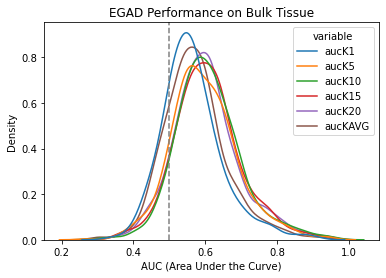

In [110]:

sns.kdeplot(EGADs_melt, x='value', hue='variable', common_norm = True)
plt.title('EGAD Performance on Bulk Tissue')
plt.xlabel('AUC (Area Under the Curve)')
plt.axvline(x=0.5, linestyle='--', color='grey')